In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# uniform
X = 2 * np.random.rand(100, 1)
X[0:5]

array([[1.85884604],
       [0.05056549],
       [1.67162434],
       [0.74041553],
       [1.09963394]])

In [33]:
# normal
# y = b + mX
# y = bias + slope * X + error/noise -> normal
y = 7 + 10 * X + np.random.randn(100, 1)
y.shape

(100, 1)

$$
f(x) -> y
$$

Text(0, 0.5, 'y')

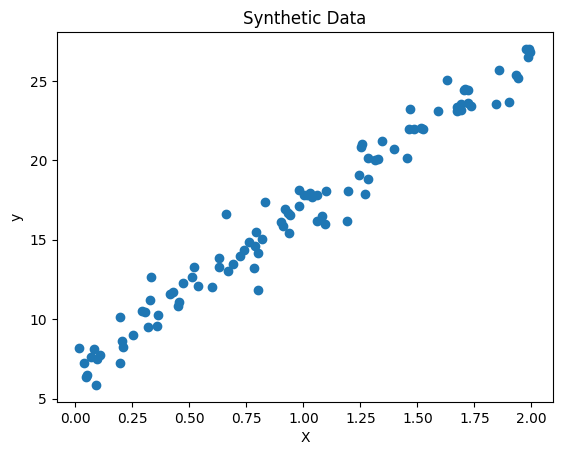

In [34]:
plt.scatter(X, y)
plt.title("Synthetic Data")
plt.xlabel("X")
plt.ylabel("y")

# Normal Equation

$$
\theta = (X^TX)^{-1} X^T y
$$

In [35]:
# add x= = 1, to each instance -> bias
X_b = np.c_[np.ones((100, 1)), X]
X_b[0:5]

array([[1.        , 1.85884604],
       [1.        , 0.05056549],
       [1.        , 1.67162434],
       [1.        , 0.74041553],
       [1.        , 1.09963394]])

In [36]:
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(f"Theta(s): \n {theta}")

Theta(s): 
 [[6.99451325]
 [9.85904163]]


In [37]:
print(f"Bias: {theta[0]}, W/slope: {theta[1]}")

Bias: [6.99451325], W/slope: [9.85904163]


# Plot the Model

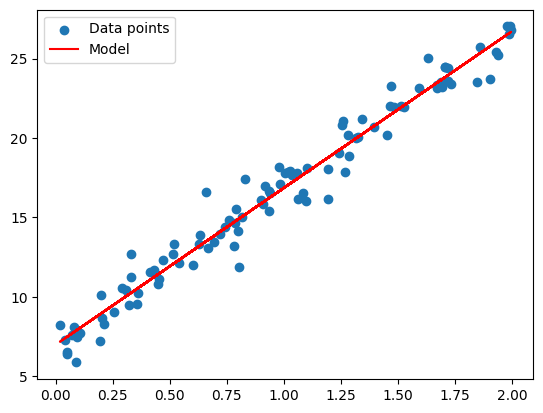

In [40]:
plt.scatter(X, y, label = "Data points")
plt.plot(X, X_b.dot(theta), c = "r", label = "Model")
plt.legend()

In [41]:
X_test = np.array([
    [0],
    [2],
    [1.2]
])
X_test

array([[0. ],
       [2. ],
       [1.2]])

In [42]:
X_test = np.c_[np.ones((3, 1)), X_test]
X_test

array([[1. , 0. ],
       [1. , 2. ],
       [1. , 1.2]])

In [43]:
y_preds = X_test.dot(theta)
y_preds

array([[ 6.99451325],
       [26.71259651],
       [18.82536321]])

In [45]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [48]:
model.intercept_, model.coef_

(array([6.99451325]), array([[9.85904163]]))

# Gradient Descent with SKlearn

In [52]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor()
model.fit(X, y.reshape(-1))
model.intercept_, model.coef_

(array([7.34247858]), array([9.55603227]))

# Polynomial Regression

Text(0.5, 1.0, 'Non-linear Data')

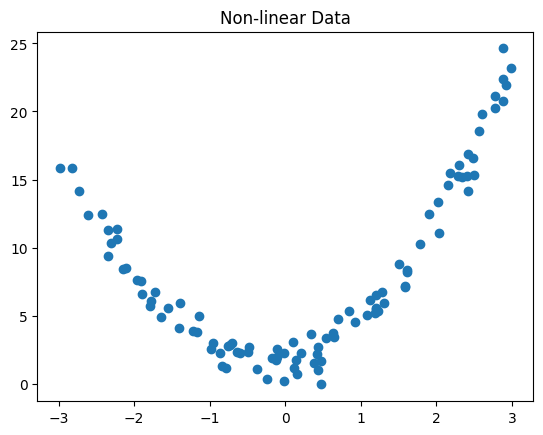

In [59]:
X = 6 * np.random.rand(100, 1) - 3
y = 2 + 2 * X**2 + X + np.random.randn(100, 1)

plt.scatter(X, y)
plt.title("Non-linear Data")


In [61]:
X[0:5]

array([[1.19368371],
       [0.64825456],
       [1.6121936 ],
       [2.41520534],
       [0.62475953]])

In [79]:
from sklearn.preprocessing import PolynomialFeatures


pol = PolynomialFeatures(degree = 2, include_bias=False)
X_poly = pol.fit_transform(X)
X_poly[0:5]

array([[1.19368371, 1.4248808 ],
       [0.64825456, 0.42023398],
       [1.6121936 , 2.59916822],
       [2.41520534, 5.83321681],
       [0.62475953, 0.39032446]])

In [80]:
model = LinearRegression()
model.fit(X_poly, y )

print(f"Bias: {model.intercept_}, W: {model.coef_}")

Bias: [1.73691266], W: [[1.02745309 2.07923956]]


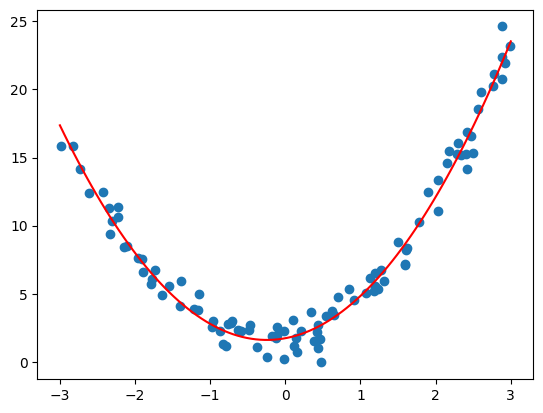

In [81]:
x_tmp = np.linspace(-3, 3, 100).reshape(100, 1)
x_tmp_poly = pol.transform(x_tmp)

plt.scatter(X, y)
plt.plot(x_tmp, model.predict(x_tmp_poly), c = "r", label = "Model")